In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

### From part 1 we have clean the dataset and remove all the rows with NA value. We will use the clean dataset here

In [2]:
clean = pd.read_csv('clean_loan_data.csv')
clean.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,Y,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,Y,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,Y,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,Y,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,Y,Urban,Y


In [3]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            308 non-null    object 
 1   Gender             308 non-null    object 
 2   Married            308 non-null    object 
 3   Dependents         308 non-null    object 
 4   Education          308 non-null    object 
 5   Self_Employed      308 non-null    object 
 6   ApplicantIncome    308 non-null    float64
 7   CoapplicantIncome  308 non-null    float64
 8   LoanAmount         308 non-null    float64
 9   Loan_Amount_Term   308 non-null    float64
 10  Credit_History     308 non-null    object 
 11  Property_Area      308 non-null    object 
 12  Loan_Status        308 non-null    object 
dtypes: float64(4), object(9)
memory usage: 31.4+ KB


## Creating a Model for Rating: Attempt 1

In [4]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
clean_cat = clean[['Gender','Married','Dependents','Education','Self_Employed', 'Credit_History','Property_Area']]
ohe.fit(clean_cat)
clean_cat_ohe = pd.DataFrame(ohe.transform(clean_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(clean_cat.columns))

# Check the encoded variables
clean_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender_Female            308 non-null    float64
 1   Gender_Male              308 non-null    float64
 2   Married_No               308 non-null    float64
 3   Married_Yes              308 non-null    float64
 4   Dependents_0             308 non-null    float64
 5   Dependents_1             308 non-null    float64
 6   Dependents_2             308 non-null    float64
 7   Dependents_3+            308 non-null    float64
 8   Education_Graduate       308 non-null    float64
 9   Education_Not Graduate   308 non-null    float64
 10  Self_Employed_No         308 non-null    float64
 11  Self_Employed_Yes        308 non-null    float64
 12  Credit_History_N         308 non-null    float64
 13  Credit_History_Y         308 non-null    float64
 14  Property_Area_Rural      3

In [5]:
# Combining Numeric features with the OHE Categorical features
clean_num = clean[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
clean_res = clean['Loan_Status']
clean_ohe = pd.concat([clean_num, clean_cat_ohe, clean_res], 
                           sort = False, axis = 1).reindex(index=clean_num.index)

# Check the final dataframe
clean_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          308 non-null    float64
 1   CoapplicantIncome        308 non-null    float64
 2   LoanAmount               308 non-null    float64
 3   Loan_Amount_Term         308 non-null    float64
 4   Gender_Female            308 non-null    float64
 5   Gender_Male              308 non-null    float64
 6   Married_No               308 non-null    float64
 7   Married_Yes              308 non-null    float64
 8   Dependents_0             308 non-null    float64
 9   Dependents_1             308 non-null    float64
 10  Dependents_2             308 non-null    float64
 11  Dependents_3+            308 non-null    float64
 12  Education_Graduate       308 non-null    float64
 13  Education_Not Graduate   308 non-null    float64
 14  Self_Employed_No         3

### Create and Fit the Model

[Text(0.625, 0.9, 'Credit_History_N <= 0.5\ngini = 0.398\nsamples = 215\nvalue = [59, 156]\nclass = Y'),
 Text(0.5416666666666666, 0.7, 'Property_Area_Semiurban <= 0.5\ngini = 0.277\nsamples = 187\nvalue = [31, 156]\nclass = Y'),
 Text(0.3333333333333333, 0.5, 'CoapplicantIncome <= 8.06\ngini = 0.354\nsamples = 113\nvalue = [26, 87]\nclass = Y'),
 Text(0.16666666666666666, 0.3, 'LoanAmount <= 97.0\ngini = 0.453\nsamples = 52\nvalue = [18, 34]\nclass = Y'),
 Text(0.08333333333333333, 0.1, 'gini = 0.496\nsamples = 22\nvalue = [12, 10]\nclass = N'),
 Text(0.25, 0.1, 'gini = 0.32\nsamples = 30\nvalue = [6, 24]\nclass = Y'),
 Text(0.5, 0.3, 'ApplicantIncome <= 4087.5\ngini = 0.228\nsamples = 61\nvalue = [8, 53]\nclass = Y'),
 Text(0.4166666666666667, 0.1, 'gini = 0.117\nsamples = 48\nvalue = [3, 45]\nclass = Y'),
 Text(0.5833333333333334, 0.1, 'gini = 0.473\nsamples = 13\nvalue = [5, 8]\nclass = Y'),
 Text(0.75, 0.5, 'Loan_Amount_Term <= 60.0\ngini = 0.126\nsamples = 74\nvalue = [5, 69]\ncl

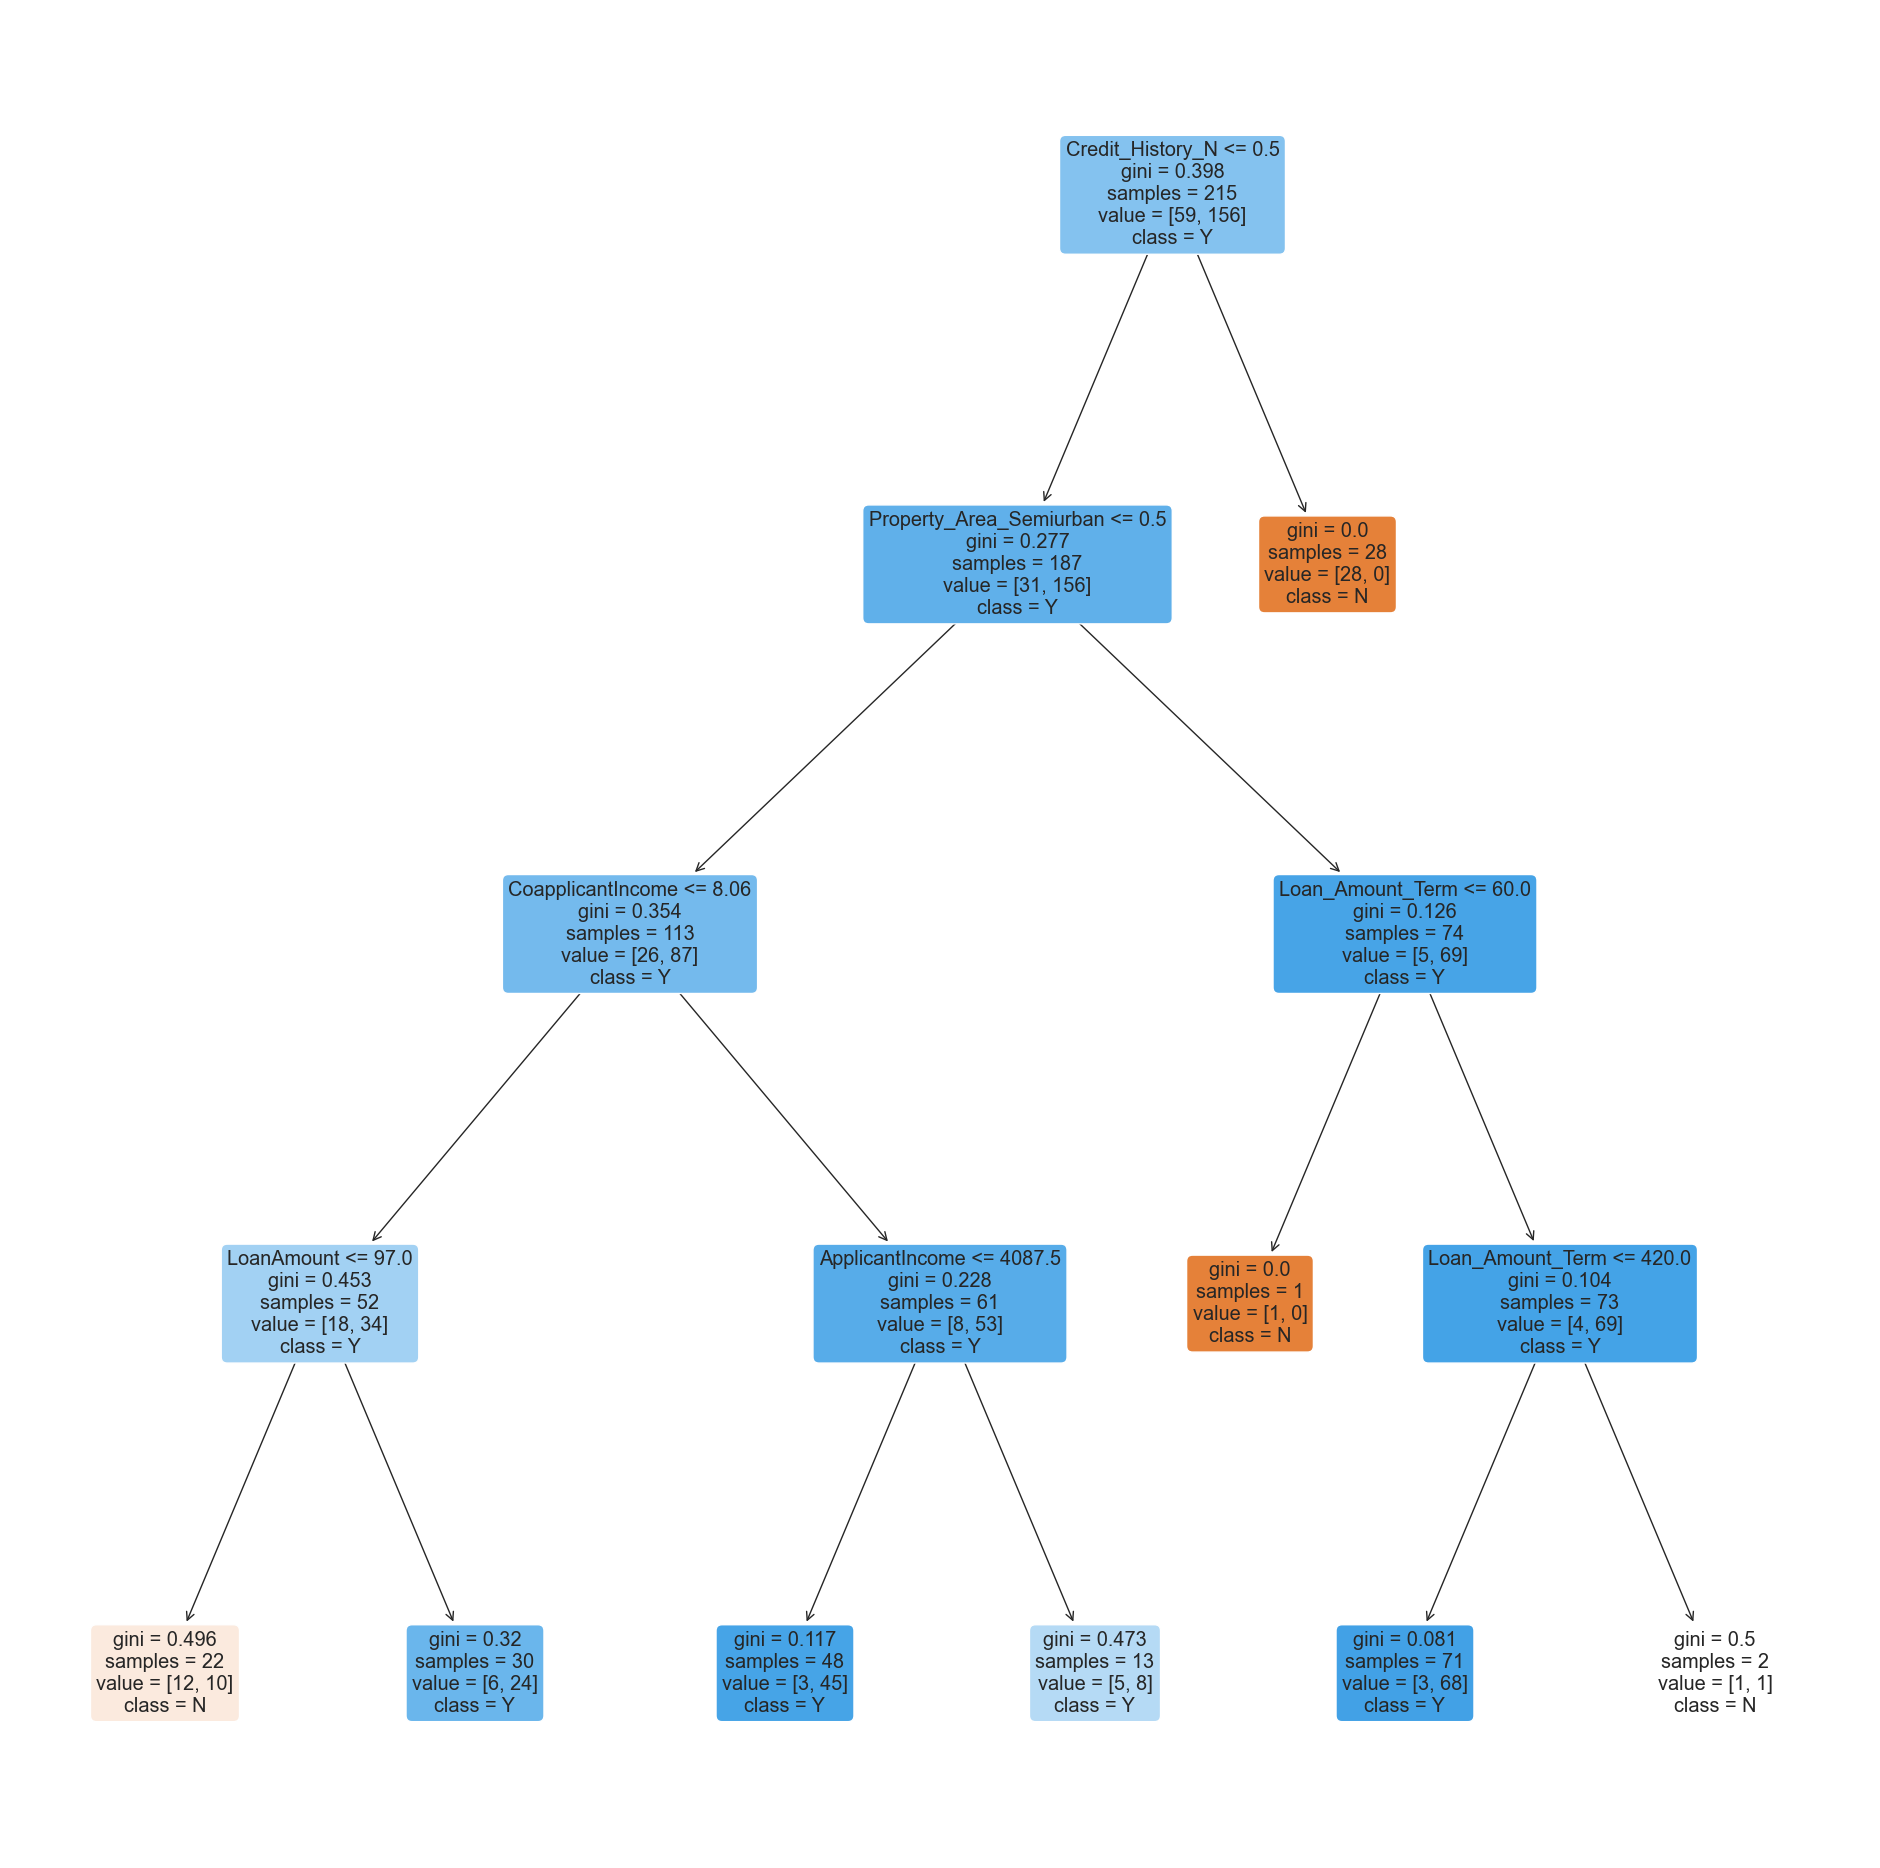

In [6]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Extract Response and Predictors
y = pd.DataFrame(clean_ohe['Loan_Status'])
X = pd.DataFrame(clean_ohe.drop('Loan_Status', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns.tolist(), 
          class_names=["N","Y"])

### Check the accuracy of the Model

Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix.  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

### Training Set

Train Data
Accuracy  :	 0.8697674418604651

TPR Train :	 0.9294871794871795
TNR Train :	 0.711864406779661

FPR Train :	 0.288135593220339
FNR Train :	 0.07051282051282051


<Axes: >

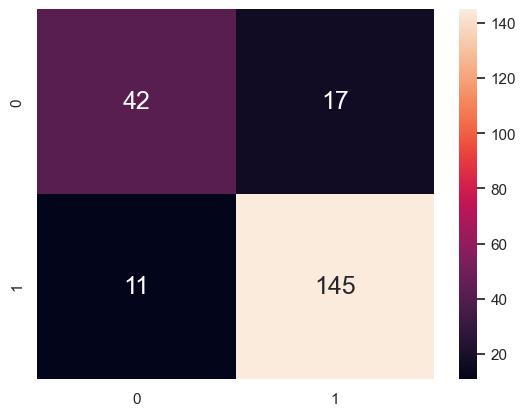

In [7]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Test Set

Test Data
Accuracy  :	 0.7204301075268817

TPR Test :	 0.8095238095238095
TNR Test :	 0.5333333333333333

FPR Test :	 0.4666666666666667
FNR Test :	 0.19047619047619047


<Axes: >

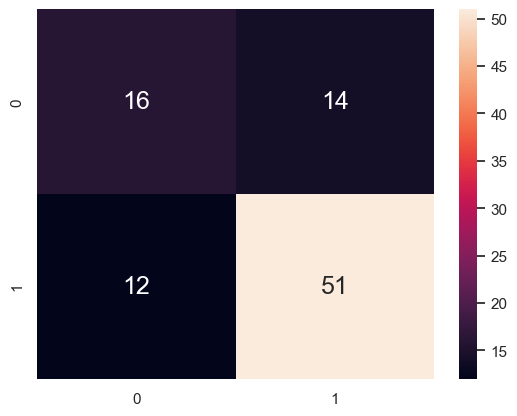

In [8]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Analysis of First Result

It can be seen that the false positive rate is quite high for the first model. For the train set, out of 53 true negatives, 11 were predicted as positive. In the test set, 28 were negative but 12 of them were predicted as positive. This is undesirable in the context of our dataset because this means that if our model were used to predict if a loan will be approve, the applicant that is not allowed to take the loan will have his loan granted. 

However, we can see from the decision tree that credit history is at the top. This also further underscores that credit history have a significant impact on loan status.

We also note that there is an unbalance number or Y and N for loan status. 

### Create a Model for Rating: Attempt 2
We will balance the response `Loan_Status`.

In [9]:
# Upsample Bad to match Good
from sklearn.utils import resample

cleanBad = clean_ohe[clean_ohe.Loan_Status == 'N']
cleanGood = clean_ohe[clean_ohe.Loan_Status == 'Y']
 
# Upsample the Bad samples
cleanBad_up = resample(cleanBad, 
                        replace=True,                     # sample with replacement
                        n_samples=cleanGood.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
clean_ohe_up = pd.concat([cleanGood, cleanBad_up])
 
# Check the ratio of the classes
clean_ohe_up['Loan_Status'].value_counts()

Loan_Status
Y    219
N    219
Name: count, dtype: int64

C:\Users\wilso\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


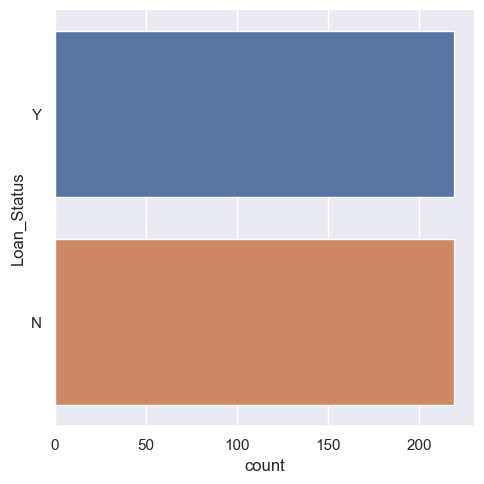

In [10]:
# Quick plot to check the balanced classes visually
sb.catplot(y = 'Loan_Status', data = clean_ohe_up, kind = "count")

In [11]:
# Confirm that the OHE is still in place
# and that the samples have now increased
clean_ohe_up.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438 entries, 1 to 210
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          438 non-null    float64
 1   CoapplicantIncome        438 non-null    float64
 2   LoanAmount               438 non-null    float64
 3   Loan_Amount_Term         438 non-null    float64
 4   Gender_Female            438 non-null    float64
 5   Gender_Male              438 non-null    float64
 6   Married_No               438 non-null    float64
 7   Married_Yes              438 non-null    float64
 8   Dependents_0             438 non-null    float64
 9   Dependents_1             438 non-null    float64
 10  Dependents_2             438 non-null    float64
 11  Dependents_3+            438 non-null    float64
 12  Education_Graduate       438 non-null    float64
 13  Education_Not Graduate   438 non-null    float64
 14  Self_Employed_No         438 no

### Create and Fit the Model

[Text(0.38095238095238093, 0.9, 'Credit_History_Y <= 0.5\ngini = 0.5\nsamples = 306\nvalue = [157, 149]\nclass = N'),
 Text(0.14285714285714285, 0.7, 'CoapplicantIncome <= 6623.0\ngini = 0.054\nsamples = 72\nvalue = [70, 2]\nclass = N'),
 Text(0.09523809523809523, 0.5, 'CoapplicantIncome <= 2360.0\ngini = 0.028\nsamples = 71\nvalue = [70, 1]\nclass = N'),
 Text(0.047619047619047616, 0.3, 'gini = 0.0\nsamples = 63\nvalue = [63, 0]\nclass = N'),
 Text(0.14285714285714285, 0.3, 'LoanAmount <= 91.5\ngini = 0.219\nsamples = 8\nvalue = [7, 1]\nclass = N'),
 Text(0.09523809523809523, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Y'),
 Text(0.19047619047619047, 0.1, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = N'),
 Text(0.19047619047619047, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Y'),
 Text(0.6190476190476191, 0.7, 'CoapplicantIncome <= 745.0\ngini = 0.467\nsamples = 234\nvalue = [87, 147]\nclass = Y'),
 Text(0.42857142857142855, 0.5, 'LoanAmount <= 97.0\ngini = 0

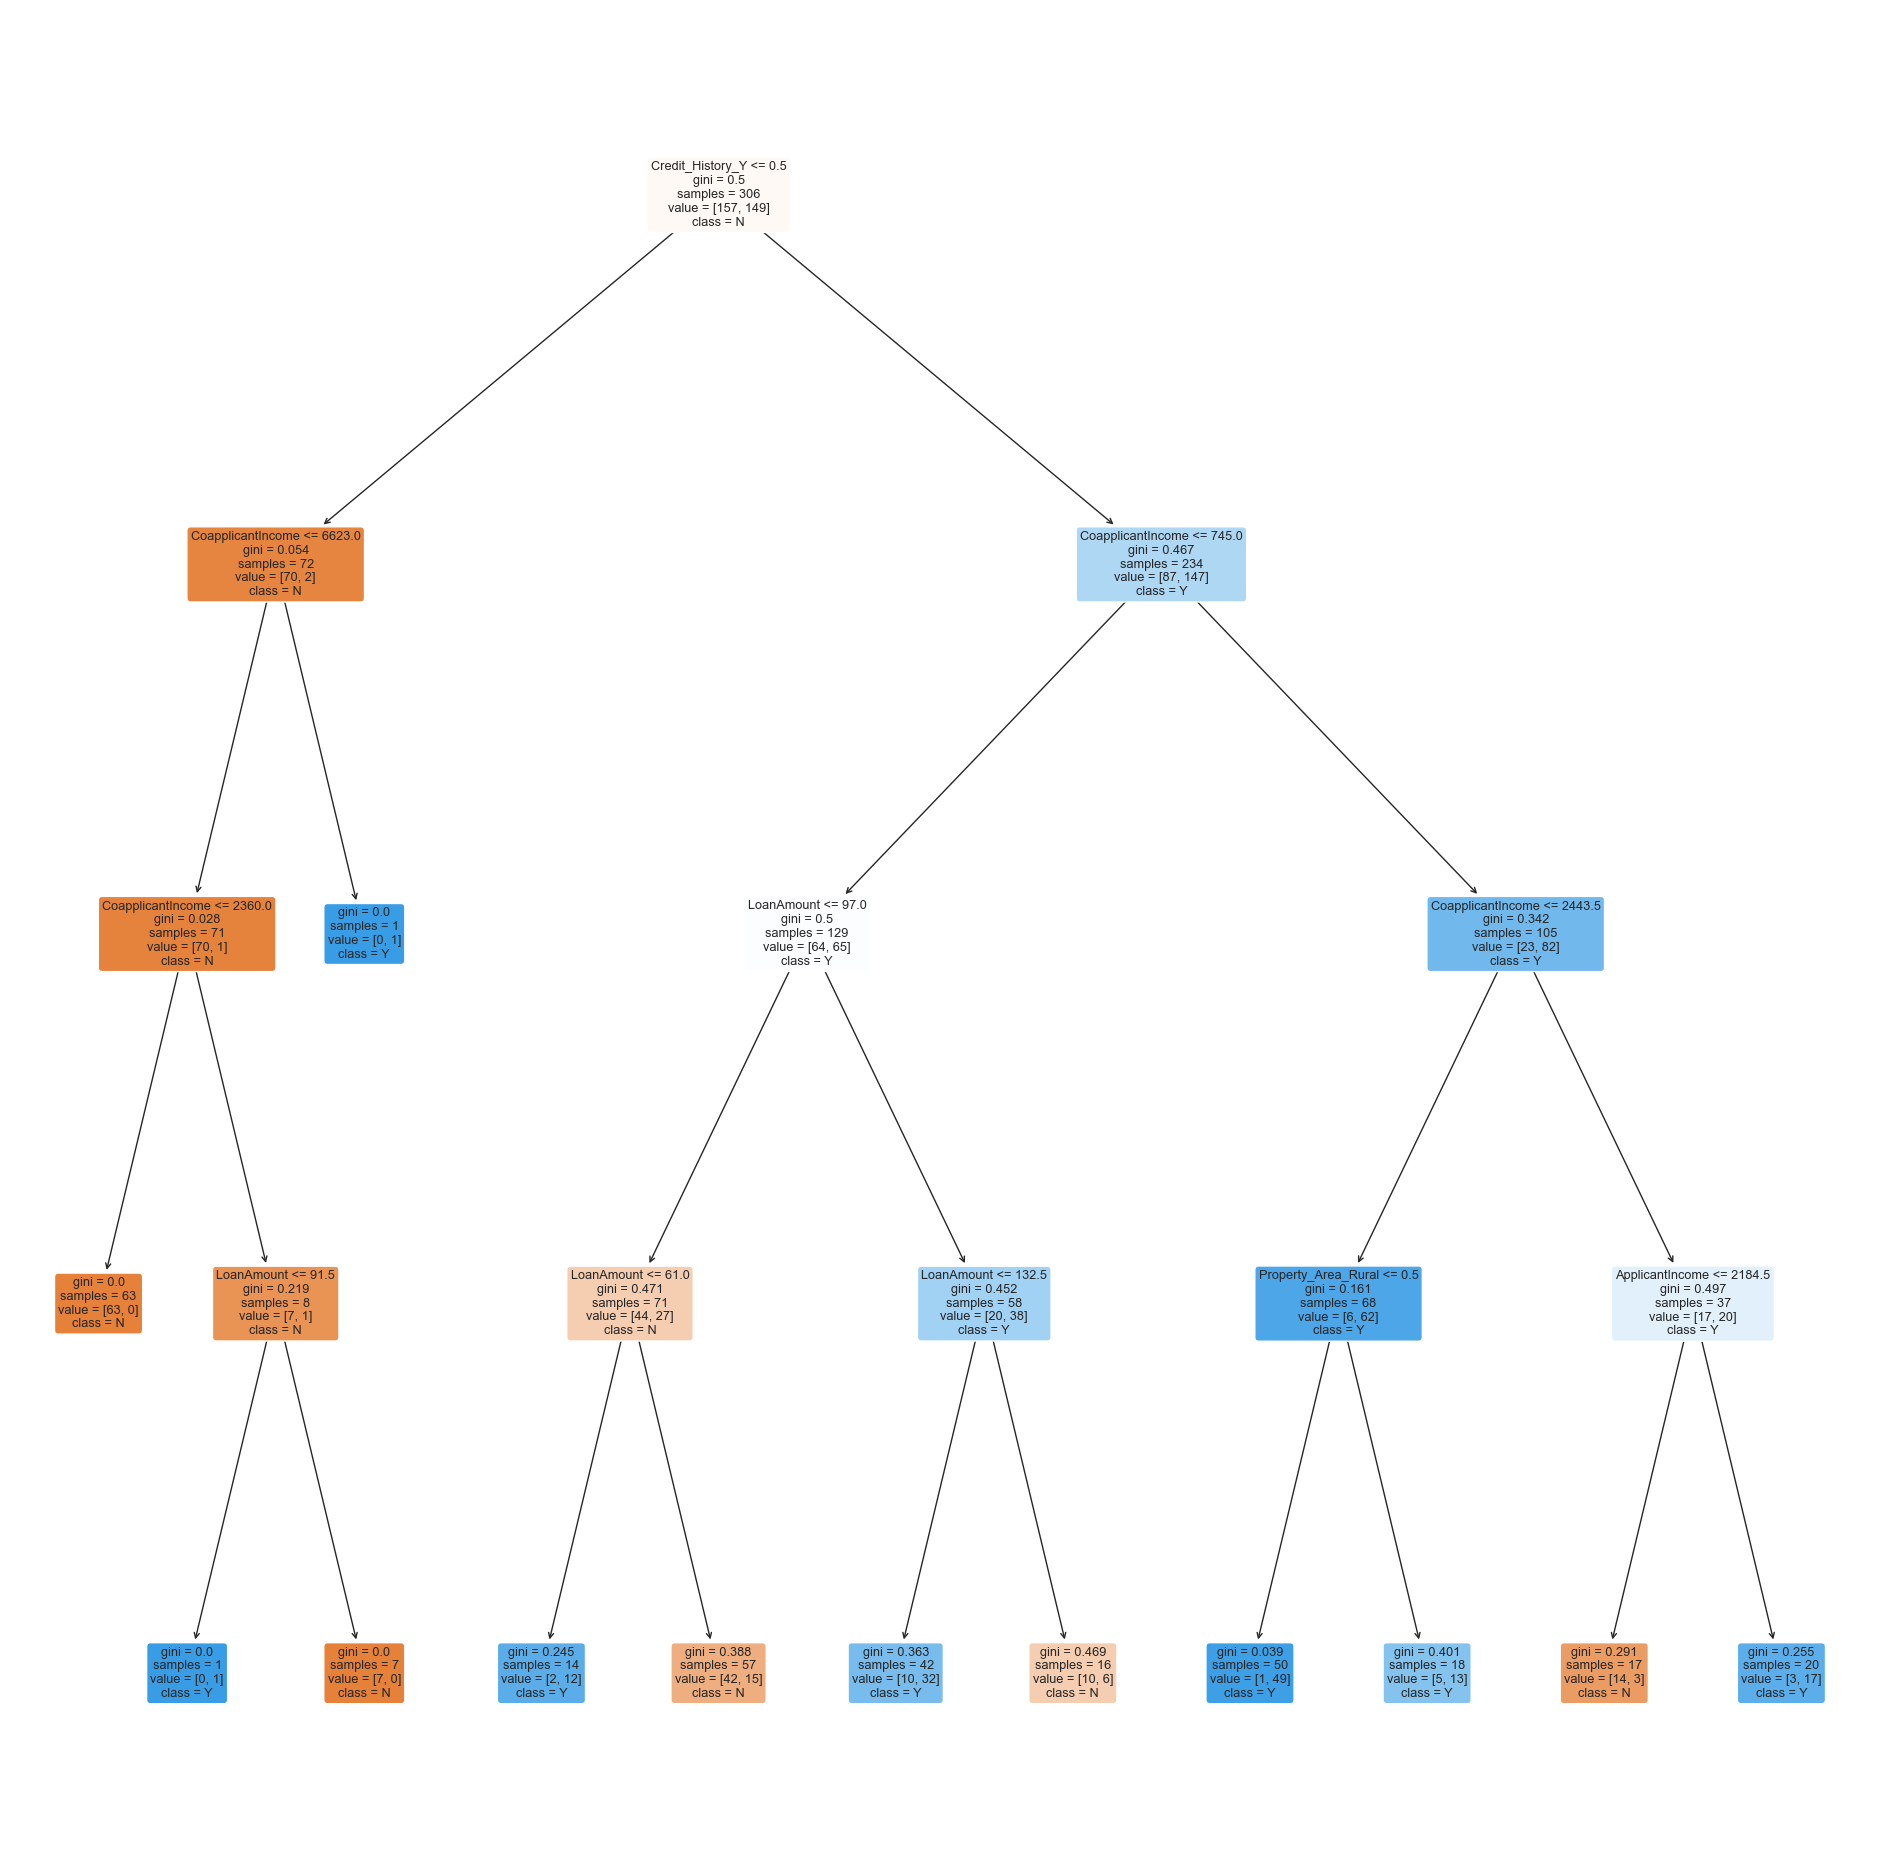

In [12]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Extract Response and Predictors
y = pd.DataFrame(clean_ohe_up['Loan_Status'])
X = pd.DataFrame(clean_ohe_up.drop('Loan_Status', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns.tolist(), 
          class_names=["N","Y"])

Train Data
Accuracy  :	 0.8529411764705882

TPR Train :	 0.8389261744966443
TNR Train :	 0.8662420382165605

FPR Train :	 0.1337579617834395
FNR Train :	 0.1610738255033557


<Axes: >

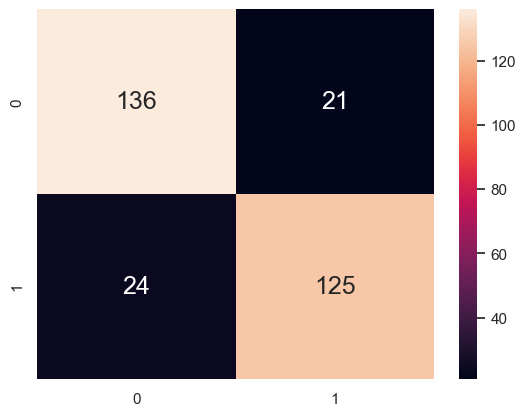

In [13]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.7878787878787878

TPR Test :	 0.7714285714285715
TNR Test :	 0.8064516129032258

FPR Test :	 0.1935483870967742
FNR Test :	 0.22857142857142856


<Axes: >

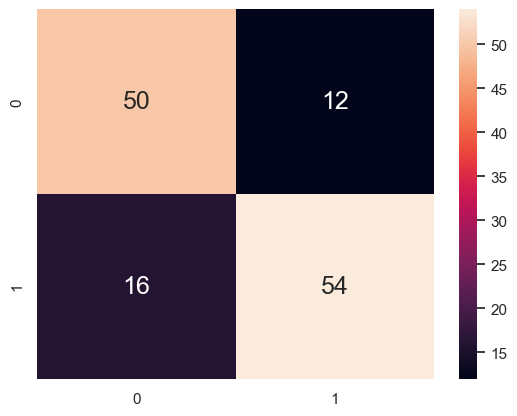

In [14]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Analysis of Second Result

From the second result, we can see that there is an improvement from the previous model as we did see a decrease in false positive rate significantly. While there is also a increase in false negative rate, in the context of our problem, we think that it is fairly acceptable because approving the loan to someone that is ineligible for it have a more negative impact than not giving to someone that is eligible for it. 

### Create a Model for Rating: Attempt 3
Using RandomForest

In [15]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(clean_ohe_up['Loan_Status'])
X = pd.DataFrame(clean_ohe_up.drop('Loan_Status', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

In [16]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.Loan_Status.ravel())

RandomForestClassifier(max_depth=4)

Train Data
Accuracy  :	 0.8660130718954249

TPR Train :	 0.9530201342281879
TNR Train :	 0.7834394904458599

FPR Train :	 0.21656050955414013
FNR Train :	 0.04697986577181208


<Axes: >

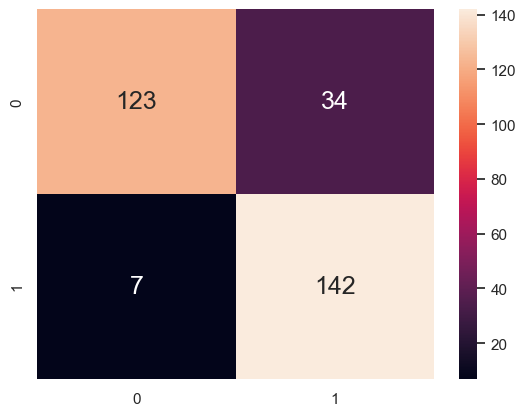

In [17]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8712121212121212

TPR Test :	 0.9571428571428572
TNR Test :	 0.7741935483870968

FPR Test :	 0.22580645161290322
FNR Test :	 0.04285714285714286


<Axes: >

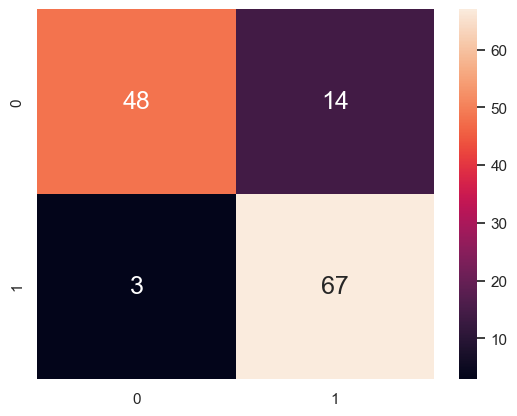

In [18]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

We observe that the accuracy of the randomforest model have increase. The FNR have decreased significantly but the FPR is increased.

## Creating a Model for Rating : Attempt 4

We will attempt to perform cross-validation to optimize the hyper parameters of the model to get a more accurate results. 

In [19]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Extract Response and Predictors
y = pd.DataFrame(clean_ohe_up['Loan_Status'])
X = pd.DataFrame(clean_ohe_up.drop('Loan_Status', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [20]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.Loan_Status.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             scoring='accuracy')

In [21]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=9, n_estimators=700)
0.8858804865150713


In [36]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(clean_ohe_up['Loan_Status'])
X = pd.DataFrame(clean_ohe_up.drop('Loan_Status', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 700,   # found using GridSearchCV
                                 max_depth = 9)       # found using GridSearchCV

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.Loan_Status.ravel())

RandomForestClassifier(max_depth=9, n_estimators=700)

Train Data
Accuracy  :	 0.9869281045751634

TPR Train :	 0.9932885906040269
TNR Train :	 0.9808917197452229

FPR Train :	 0.01910828025477707
FNR Train :	 0.006711409395973154


<Axes: >

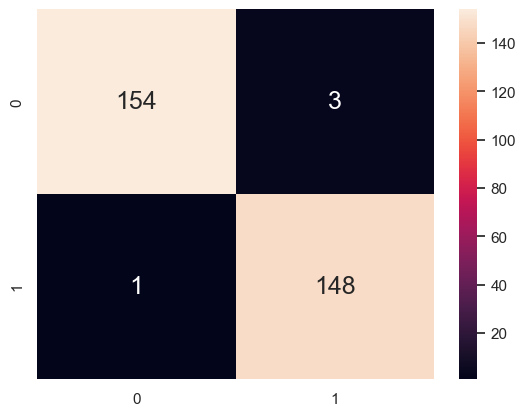

In [38]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9318181818181818

TPR Test :	 0.9428571428571428
TNR Test :	 0.9193548387096774

FPR Test :	 0.08064516129032258
FNR Test :	 0.05714285714285714


<Axes: >

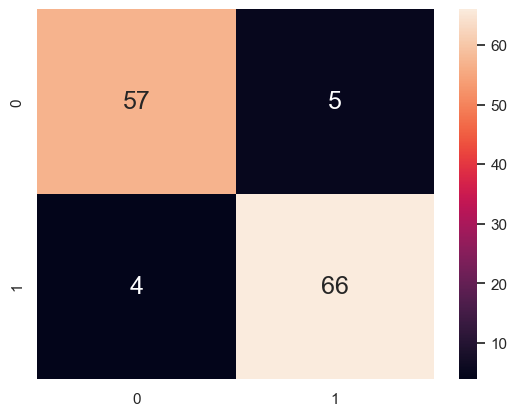

In [39]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Analysis of Model 4
After tuning the hyperparameters, we were able to improve the accuracy for the train data from 0.87 to 0.98. The FPR also decreased from 0.21 to 0.02. For the test set, the accuracy improved from 0.87 to 0.93. The FPR also decreased from 0.22 to 0.08.